#  Clustering abalysis - Content list
1. Import libraries and data
2. The elbow technique
3. k-means clustering
4. Visualizations
5. Descriptive statistics

# 1. Import libraries and data and prep data

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import Data
# Create path
path = r'C:\Users\Mathilde\Documents\DATA ANALYSIS CAREERFOUNDRY\Aug 2024 - SNCF project'
# Import the merged data set
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared data', 'dataset_formatted.csv'), index_col = False)

In [3]:
pd.set_option('display.max_columns', None)
df.head(1)

,Unnamed: 0.1,Unnamed: 0,Date,Service,Departure station,Arrival station,Avg trip length,Number of trips scheduled,Number of trains cancelled,Number of trains delayed on departure,Avg delay of trains delayed on departure,Avg delay of all trains on departure,Number of trains delayed on arrival,Avg delay of trains delayed on arrival,Avg delay of all trains on arrival,Comments delay on arrival,Number of trains >15 min delay,Number of trains >30 min delay,Number of trains >60 min delay,% delay from external causes,% delay infrastructure cause,% delay traffic management cause,% delay rolling stock cause,% delay station management and reutilization of stock,"% delay because of accommodation of passengers (crowd, disability, connections)",Departure region,Arrival region,Departure station: Total travelers 2023,Departure station: Total travelers 2022,Departure station: Total travelers 2021,Departure station: Total travelers 2020,Departure station: Total travelers 2019,Departure station: Total travelers 2018,Arrival station: Total travelers 2023,Arrival station: Total travelers 2022,Arrival station: Total travelers 2021,Arrival station: Total travelers 2020,Arrival station: Total travelers 2019,Arrival station: Total travelers 2018
0,0,0,2018-01,National,Bordeaux Saint-Jean,Paris Montparnasse,141,870,5,289,11.247809,3.693179,147,28.436735,6.511118,NaN,110,44,8,36.134454,31.092437,10.92437,15.966387,5.042017,0.840336,Nouvelle-Aquitaine,Ile-de-France,22612374.0,21353889.0,16454662.0,11184093.0,17675655.0,16080989.0,64471254.0,56862435.0,41039816.0,32447396.0,61374056.0,59174533.0


In [4]:
# Keep only the columns relevant to analysis, drop categorical variables
df = df.drop(columns = ['Unnamed: 0.1', 'Unnamed: 0', 'Date', 'Service', 'Departure station', 'Arrival station', 'Comments delay on arrival', 'Departure region', 'Arrival region'])

In [5]:
df.head(1)

,Avg trip length,Number of trips scheduled,Number of trains cancelled,Number of trains delayed on departure,Avg delay of trains delayed on departure,Avg delay of all trains on departure,Number of trains delayed on arrival,Avg delay of trains delayed on arrival,Avg delay of all trains on arrival,Number of trains >15 min delay,Number of trains >30 min delay,Number of trains >60 min delay,% delay from external causes,% delay infrastructure cause,% delay traffic management cause,% delay rolling stock cause,% delay station management and reutilization of stock,"% delay because of accommodation of passengers (crowd, disability, connections)",Departure station: Total travelers 2023,Departure station: Total travelers 2022,Departure station: Total travelers 2021,Departure station: Total travelers 2020,Departure station: Total travelers 2019,Departure station: Total travelers 2018,Arrival station: Total travelers 2023,Arrival station: Total travelers 2022,Arrival station: Total travelers 2021,Arrival station: Total travelers 2020,Arrival station: Total travelers 2019,Arrival station: Total travelers 2018
0,141,870,5,289,11.247809,3.693179,147,28.436735,6.511118,110,44,8,36.134454,31.092437,10.92437,15.966387,5.042017,0.840336,22612374.0,21353889.0,16454662.0,11184093.0,17675655.0,16080989.0,64471254.0,56862435.0,41039816.0,32447396.0,61374056.0,59174533.0


In [6]:
# Check for columns with NaN, as KMeans does not accept missing values encoded as NaN natively
df.isnull().sum()

Avg trip length                                                                      0
Number of trips scheduled                                                            0
Number of trains cancelled                                                           0
Number of trains delayed on departure                                                0
Avg delay of trains delayed on departure                                             0
Avg delay of all trains on departure                                                 0
Number of trains delayed on arrival                                                  0
Avg delay of trains delayed on arrival                                               0
Avg delay of all trains on arrival                                                   0
Number of trains >15 min delay                                                       0
Number of trains >30 min delay                                                       0
Number of trains >60 min delay             

As we know since we combined the 2 initial data sets, these rows correspond to the international stations, and to Paris Vaugirard  station, for which we did not have data on the number of travelers. Let's drop these rows - the scope of this analysis will be focused on national transport only.

In [7]:
df = df.dropna(subset=['Departure station: Total travelers 2023', 'Arrival station: Total travelers 2023'])

In [8]:
# Check that all NaN are gone
df.isnull().sum()

Avg trip length                                                                    0
Number of trips scheduled                                                          0
Number of trains cancelled                                                         0
Number of trains delayed on departure                                              0
Avg delay of trains delayed on departure                                           0
Avg delay of all trains on departure                                               0
Number of trains delayed on arrival                                                0
Avg delay of trains delayed on arrival                                             0
Avg delay of all trains on arrival                                                 0
Number of trains >15 min delay                                                     0
Number of trains >30 min delay                                                     0
Number of trains >60 min delay                                   

# 2. The elbow technique

In [9]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [10]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] # Creates a score that represents a rate of variation for the given cluster option.

score

[-2.255359821653961e+20,
 -1.0721689567622414e+20,
 -6.18832025165052e+19,
 -3.66157048249392e+19,
 -2.000032670425869e+19,
 -7.277431389632768e+18,
 -4.0744184757953556e+18,
 -2.493056732275368e+18,
 -1.8817352790697539e+18]

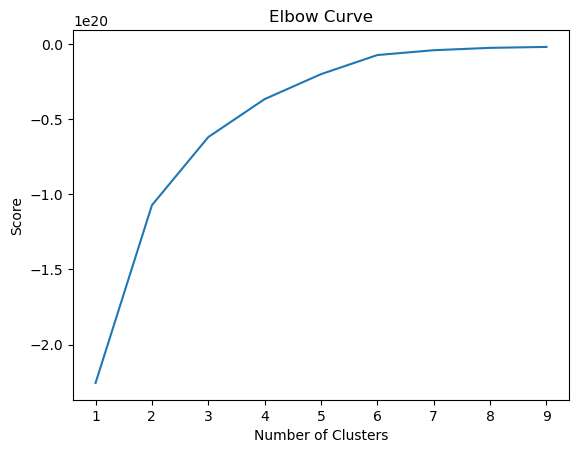

In [11]:
# Plot the elbow curve using PyLab
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

### Conclusion:
The curve keeps going up until reaching 6 on the X axis, and flattens after that. This means that the optimal count for your clusters is 6.

# 3. k-means clustering

In [12]:
# Create the k-means object
kmeans = KMeans(n_clusters = 6) 

In [13]:
# Fit the k-means object to the data
kmeans.fit(df)

KMeans(n_clusters=6)

In [14]:
# Attach a new column with the resulting clusters
df['clusters'] = kmeans.fit_predict(df)

In [15]:
df.head()

,Avg trip length,Number of trips scheduled,Number of trains cancelled,Number of trains delayed on departure,Avg delay of trains delayed on departure,Avg delay of all trains on departure,Number of trains delayed on arrival,Avg delay of trains delayed on arrival,Avg delay of all trains on arrival,Number of trains >15 min delay,Number of trains >30 min delay,Number of trains >60 min delay,% delay from external causes,% delay infrastructure cause,% delay traffic management cause,% delay rolling stock cause,% delay station management and reutilization of stock,"% delay because of accommodation of passengers (crowd, disability, connections)",Departure station: Total travelers 2023,Departure station: Total travelers 2022,Departure station: Total travelers 2021,Departure station: Total travelers 2020,Departure station: Total travelers 2019,Departure station: Total travelers 2018,Arrival station: Total travelers 2023,Arrival station: Total travelers 2022,Arrival station: Total travelers 2021,Arrival station: Total travelers 2020,Arrival station: Total travelers 2019,Arrival station: Total travelers 2018,clusters
0,141,870,5,289,11.247809,3.693179,147,28.436735,6.511118,110,44,8,36.134454,31.092437,10.924370,15.966387,5.042017,0.840336,22612374.0,21353889.0,16454662.0,11184093.0,17675655.0,16080989.0,64471254.0,56862435.0,41039816.0,32447396.0,61374056.0,59174533.0,4
1,165,222,0,8,2.875000,0.095796,34,21.524020,5.696096,22,5,0,15.384615,30.769231,38.461538,11.538462,3.846154,0.000000,2925287.0,2692269.0,2059413.0,1490951.0,2235983.0,1984267.0,64471254.0,56862435.0,41039816.0,32447396.0,61374056.0,59174533.0,4
2,220,248,1,37,9.501351,1.003981,26,55.692308,7.578947,26,17,7,26.923077,38.461538,15.384615,19.230769,0.000000,0.000000,64471254.0,56862435.0,41039816.0,32447396.0,61374056.0,59174533.0,1619395.0,1483787.0,1076265.0,745934.0,1058048.0,951271.0,0
3,156,102,0,12,19.912500,1.966667,13,48.623077,6.790686,8,6,4,23.076923,46.153846,7.692308,15.384615,7.692308,0.000000,64471254.0,56862435.0,41039816.0,32447396.0,61374056.0,59174533.0,1703866.0,1638571.0,1202705.0,889726.0,1263626.0,1135793.0,0
4,61,391,2,61,7.796995,0.886889,71,12.405164,3.346487,17,6,0,21.212121,42.424242,9.090909,21.212121,6.060606,0.000000,64471254.0,56862435.0,41039816.0,32447396.0,61374056.0,59174533.0,4252582.0,3784800.0,2918332.0,2121656.0,3710116.0,3457033.0,0


In [16]:
df['clusters'].value_counts()

clusters
0    2337
4    2273
1    1560
5    1560
3     312
2     312
Name: count, dtype: int64

# 4. Visualizations

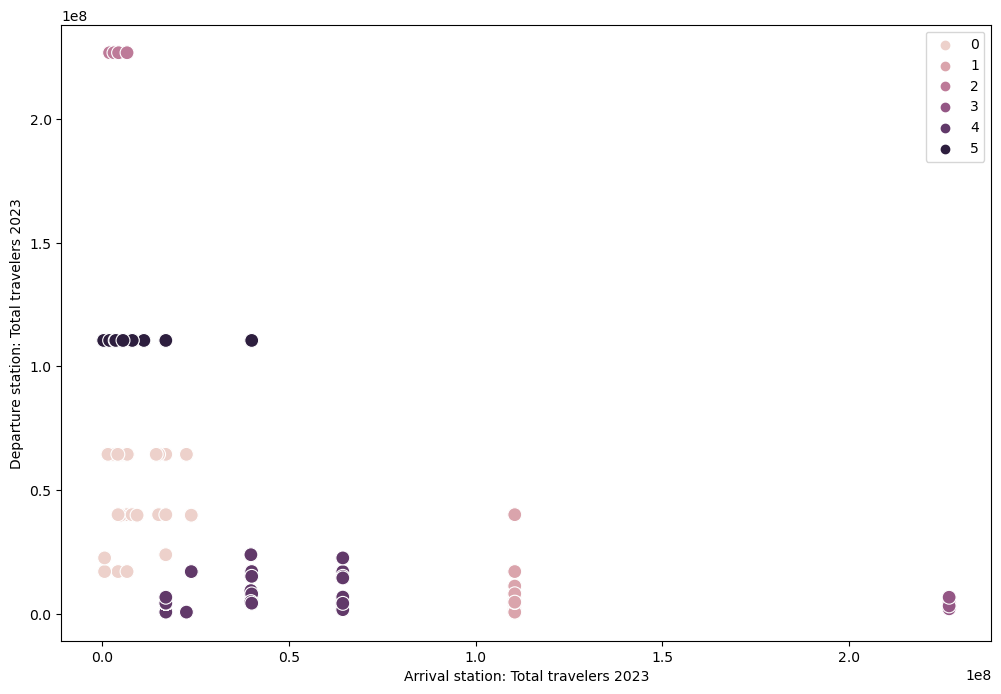

In [17]:
# Plot the clusters for the "Arrival station: Total travelers 2023" and "Departure station: Total travelers 2023" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Arrival station: Total travelers 2023'], y=df['Departure station: Total travelers 2023'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('Arrival station: Total travelers 2023')
plt.ylabel('Departure station: Total travelers 2023')
plt.show()

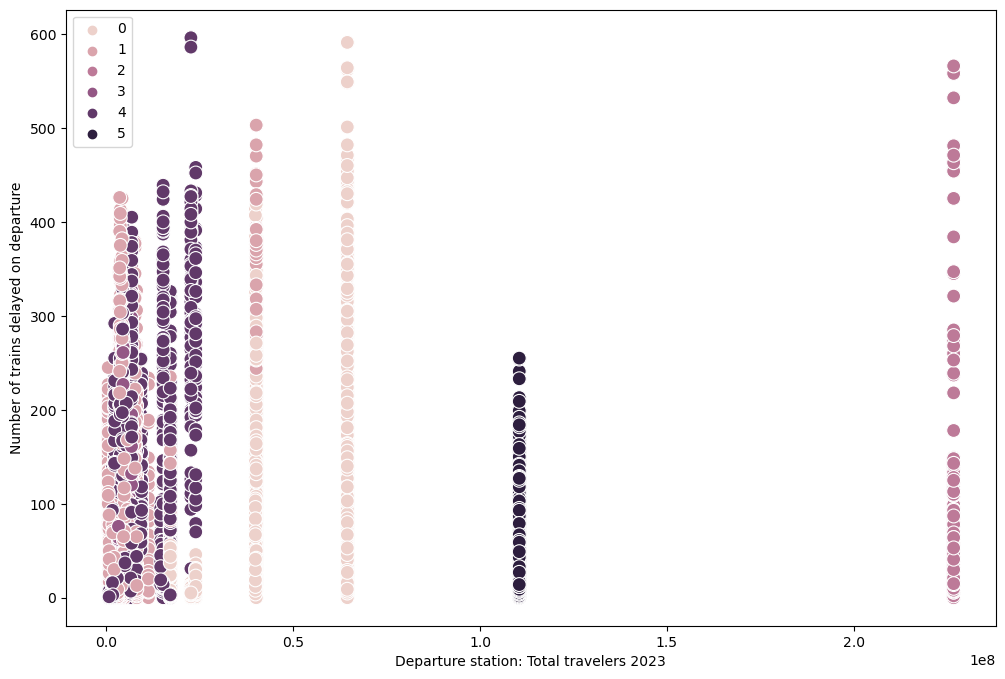

In [18]:
# Plot the clusters for the "Departure station: Total travelers 2023" and "Number of trains delayed on departure" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Departure station: Total travelers 2023'], y=df['Number of trains delayed on departure'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('Departure station: Total travelers 2023')
plt.ylabel('Number of trains delayed on departure')
plt.show()

### Insights:
From the plots, I can tell that "Cluster 4" corresponds to trains departing from the only train station with more than 2 million visitors in 2023, which is Paris Gare du Nord. "Cluster 4" means "trains departing from Paris Gare du Nord".

Similarly, I can tell that "Cluster 0" means "trains departing from Paris Gare de Lyon". "Cluster 2" includes departures from "Paris Montparnasse", "Lyon Part Dieu", "Paris Est" and another one.

Gare du Nord and Gare de Lyon are almost outliers, and prevent us from actually seeing patterns in the rest of the observation, and those two plots don't give more insight than that.


Let's try to plot other variables that don't involve "Total travelers" variables.

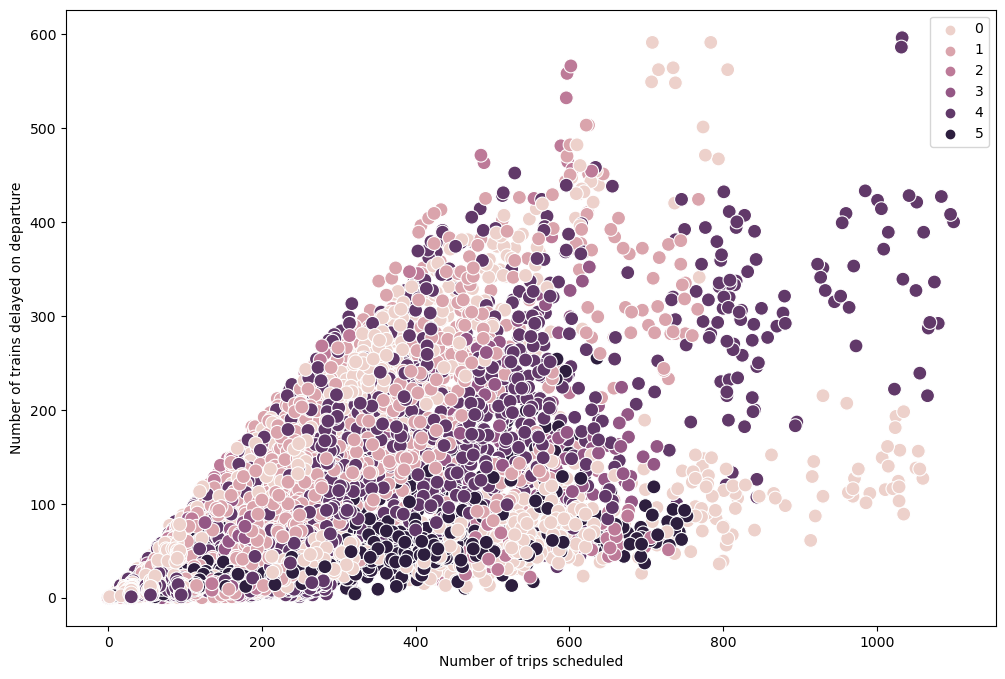

In [19]:
# Plot the clusters for the "Number of trips scheduled" and "Number of trains delayed on departure" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Number of trips scheduled'], y=df['Number of trains delayed on departure'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('Number of trips scheduled')
plt.ylabel('Number of trains delayed on departure')
plt.show()

### Insights:
* "Cluster 4" is only present in the bottom part of the graph: Gare du Nord is a punctual train station on departure.
* When exploring relationships in a previous notebook, I noted that trains departing from Paris were wether very low on this graph (very punctual on departure) or very high (generated a lot of delay on departure), but not in the middle. We see the same trend here with "Cluster 3": which leaves me with the same curiosity as to which train stations belong to the punctual ones, or to the ones generating delay, but doesn't give an answer.


I think it would be more interesting and relevant to use the categorical variables in my data set instead of the generated clusters. 

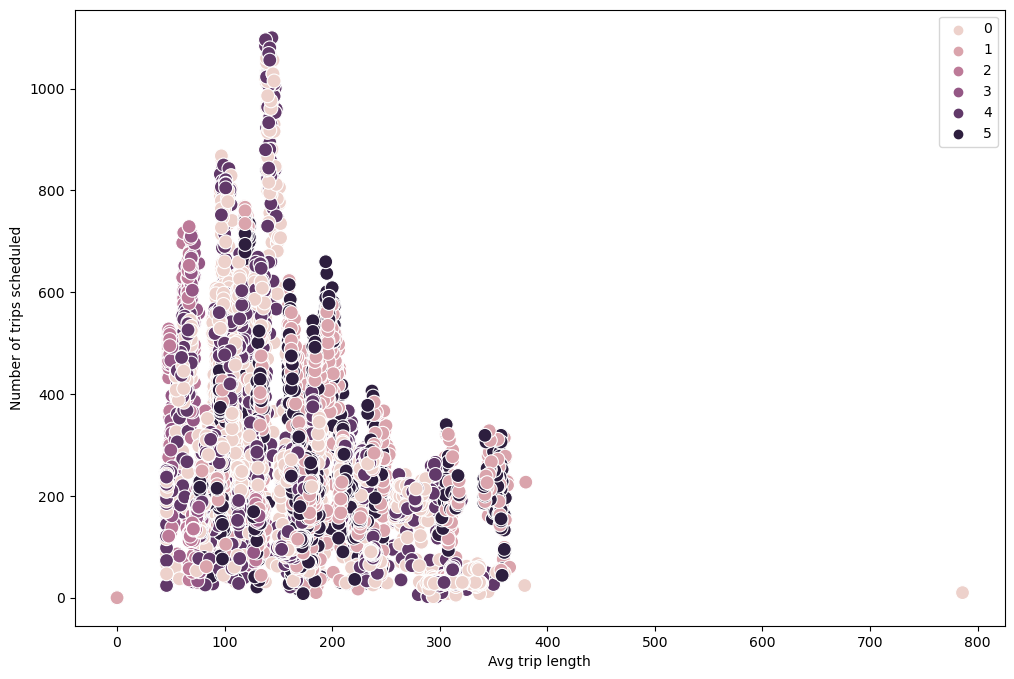

In [20]:
# Plot the clusters for the "Avg trip length" and "Number of trips scheduled" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Avg trip length'], y=df['Number of trips scheduled'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('Avg trip length')
plt.ylabel('Number of trips scheduled')
plt.show()

# 5. Descriptive statistics

In [21]:
df.groupby('clusters').agg({'Avg trip length':['mean', 'median'], 
                         'Number of trips scheduled':['mean', 'median'], 
                         'Number of trains cancelled':['mean', 'median'],
                         'Number of trains delayed on departure':['mean', 'median'],
                         'Avg delay of trains delayed on departure':['mean', 'median'],
                         'Avg delay of all trains on departure':['mean', 'median'],
                         'Number of trains delayed on arrival':['mean', 'median'],
                         'Avg delay of trains delayed on arrival':['mean', 'median'],
                         'Avg delay of all trains on arrival':['mean', 'median'],
                         'Number of trains >15 min delay':['mean', 'median'],
                         'Number of trains >30 min delay':['mean', 'median'],
                         'Number of trains >60 min delay':['mean', 'median'],
                         '% delay from external causes':['mean', 'median'],
                         '% delay infrastructure cause':['mean', 'median'],
                         '% delay traffic management cause':['mean', 'median'],
                         '% delay rolling stock cause':['mean', 'median'],
                         '% delay station management and reutilization of stock':['mean', 'median'],
                         '% delay because of accommodation of passengers (crowd, disability, connections)':['mean', 'median'],
                         'Departure station: Total travelers 2023':['mean', 'median'],
                         'Departure station: Total travelers 2018':['mean', 'median'],
                         'Arrival station: Total travelers 2023':['mean', 'median'],
                         'Arrival station: Total travelers 2018':['mean', 'median']})

Avg trip length        Number of trips scheduled         \
                    mean median                      mean median   
clusters                                                           
0             155.672657  129.0                290.427899  249.0   
1             179.025641  174.0                273.529487  236.0   
2              77.144231   68.0                318.371795  251.5   
3              80.131410   74.0                326.910256  239.5   
4             152.136384  127.0                300.190937  262.0   
5             177.578205  174.0                270.044231  228.5   

         Number of trains cancelled         \
                               mean median   
clusters                                     
0                         11.711168    2.0   
1                          9.259615    2.0   
2                         14.618590    5.0   
3                         14.724359    5.0   
4                         11.562692    2.0   
5                          9.183974    2.0   

         Number of trains delayed on departure         \
                                          mean median   
clusters                                                
0                                    85.542148   48.0   
1                                   122.547436  106.0   
2                                    74.448718   47.0   
3                                   105.801282   94.5   
4                                   116.219534   95.0   
5                                    47.089744   39.0   

         Avg delay of trains delayed on departure             \
                                             mean     median   
clusters                                                       
0                                       11.599404  10.753509   
1                                       11.552633   8.596526   
2                                       14.451038  13.319459   
3                                        9.929176   7.088799   
4                                       10.283986   8.451010   
5                                       14.668231  14.372516   

         Avg delay of all trains on departure            \
                                         mean    median   
clusters                                                  
0                                    2.856902  1.929326   
1                                    4.314214  3.311312   
2                                    2.873476  1.637382   
3                                    3.189382  1.854538   
4                                    3.435669  2.686425   
5                                    2.077251  1.724048   

         Number of trains delayed on arrival         \
                                        mean median   
clusters                                              
0                                  36.791613   30.0   
1                                  38.845513   32.0   
2                                  39.282051   31.5   
3                                  55.817308   46.5   
4                                  44.534536   35.0   
5                                  31.787179   28.0   

         Avg delay of trains delayed on arrival             \
                                           mean     median   
clusters                                                     
0                                     33.394039  31.371069   
1                                     36.928515  35.541432   
2                                     25.467362  24.111829   
3                                     20.920369  19.726499   
4                                     32.800300  30.338298   
5                                     36.547679  35.099857   

         Avg delay of all trains on arrival            \
                                       mean    median   
clusters                                                
0                                  5.625006  4.571848   
1                                  6.289139  5.560162   
2                 

### Conclusion:
The clusters overlap with the existing categorical variables we already had, but with less precision. They are not bringing great insights and it would be much more relevant to keep conducting our analysis based on regions and train stations.

In [22]:
# Export df with clusters
df.to_csv(os.path.join(path, '02 Data', 'Prepared data', 'df_w_clusters.csv'))